**Import the libraries**

In [107]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Analysis for railtraffic

In [108]:
data_railtraffic = pd.read_csv('/content/dataset1.csv')

In [109]:
data_railtraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Line/Corridor  16 non-null     object 
 1   1991           16 non-null     int64  
 2   1999           16 non-null     int64  
 3   2000           16 non-null     int64  
 4   2001           16 non-null     int64  
 5   2002           16 non-null     int64  
 6   2003           16 non-null     int64  
 7   2004           16 non-null     int64  
 8   2005           16 non-null     int64  
 9   2006           16 non-null     int64  
 10  2007           16 non-null     int64  
 11  2008           16 non-null     int64  
 12  2009           16 non-null     int64  
 13  2010           16 non-null     int64  
 14  2011           16 non-null     int64  
 15  2012           16 non-null     int64  
 16  2013           16 non-null     int64  
 17  2014           16 non-null     int64  
 18  2015        

In [110]:
data_railtraffic.describe()

,1991,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,Std_Dev,Anomaly
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,...,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,896.500000,1062.687500,1059.375000,1105.125000,988.812500,1159.312500,1209.875000,1302.812500,1378.375000,1477.68750,...,1491.62500,1450.625000,1636.437500,1663.875000,1621.875000,1643.062500,1648.437500,1756.875000,313.059253,0.562500
std,871.095785,945.383148,920.912799,955.018246,820.783221,932.492554,931.808126,1028.335368,1070.380236,1202.08423,...,1198.33456,982.404796,1185.677751,1268.723026,1313.933427,1305.625953,1254.276735,1290.885271,209.691196,0.512348
min,0.000000,115.000000,101.000000,134.000000,145.000000,148.000000,109.000000,149.000000,151.000000,159.00000,...,159.00000,212.000000,190.000000,248.000000,301.000000,278.000000,264.000000,263.000000,62.730134,0.000000
25%,249.750000,365.500000,365.000000,354.750000,375.750000,480.750000,518.250000,538.500000,600.750000,604.50000,...,633.75000,667.250000,838.750000,821.250000,610.500000,729.500000,734.500000,842.750000,174.654915,0.000000
50%,568.500000,750.000000,833.000000,905.500000,788.500000,950.000000,977.000000,1056.500000,1113.500000,1226.50000,...,1151.50000,1197.000000,1336.000000,1248.500000,1153.500000,1253.500000,1318.500000,1399.000000,252.774873,1.000000
75%,1237.500000,1488.000000,1494.500000,1543.750000,1298.000000,1501.000000,1722.500000,1814.250000,1661.500000,1773.25000,...,1684.25000,1813.750000,1942.750000,2042.500000,1849.000000,1941.000000,2004.000000,2362.250000,420.257569,1.000000
max,2633.000000,3306.000000,3356.000000,3624.000000,2970.000000,3338.000000,3574.000000,3898.000000,3937.000000,4444.00000,...,4573.00000,3247.000000,4307.000000,4850.000000,4519.000000,4627.000000,4575.000000,4538.000000,823.000183,1.000000


In [111]:
data_railtraffic.columns

Index(['Line/Corridor', '1991', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Period', 'Std_Dev', 'Anomaly'],
      dtype='object')

In [112]:
data_railtraffic.head(5)

,Line/Corridor,1991,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,Period,Std_Dev,Anomaly
0,Wigan/Bolton,2541,3306,3356,3624,2970,3338,3574,3898,3937,...,3247,4307,4850,4519,4627,4575,4538,Peak,679.251666,0
1,Rochdale/Oldham,1200,1268,1377,1383,1133,1322,1572,1619,1437,...,1153,1069,1144,1098,1216,1217,1405,Peak,169.614799,0
2,Ashton,407,931,871,930,1046,1061,1230,1273,1268,...,1442,1551,1353,1209,1291,1420,1538,Peak,270.441074,1
3,Marple/Glossop,2111,2173,2280,2026,1793,2038,2270,2400,2335,...,2614,2644,2905,2896,3078,3138,3329,Peak,416.658923,0
4,Stockport,2633,2396,2175,2152,2218,2392,2216,2513,2576,...,2922,2804,2970,2959,3083,3459,3736,Peak,431.053509,0


In [113]:
from sklearn.ensemble import IsolationForest

In [114]:
df_columns = data_railtraffic[['1991', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Period', 'Std_Dev','Anomaly']]

df_train = pd.get_dummies(df_columns)

**Isolation Forest**

In [115]:
model_clf = IsolationForest(random_state = 42)
preds = model_clf.fit_predict(df_train)

In [116]:
print('Anomaly Detection by the isolation forest:')
df_train.loc[preds == -1]

Anomaly Detection by the isolation forest:


,1991,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,Std_Dev,Anomaly,Period_Peak,Period_off-Peak
0,2541,3306,3356,3624,2970,3338,3574,3898,3937,4444,...,4307,4850,4519,4627,4575,4538,679.251666,0,1,0
3,2111,2173,2280,2026,1793,2038,2270,2400,2335,2539,...,2644,2905,2896,3078,3138,3329,416.658923,0,1,0
4,2633,2396,2175,2152,2218,2392,2216,2513,2576,2801,...,2804,2970,2959,3083,3459,3736,431.053509,0,1,0
8,1215,2148,1847,2159,1878,2522,2174,2436,3133,3320,...,3834,3543,4212,3895,3161,3412,823.000183,1,0,1
15,128,115,101,134,145,148,109,149,151,159,...,190,248,301,278,264,263,62.730134,1,0,1


**Autoencoder Process**

In [117]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [118]:
pipeline = Pipeline([('normalizer', Normalizer()), ('scaler', MinMaxScaler())])

In [119]:
df_train_transformed = pipeline.fit_transform(df_train)

In [120]:
df_train_transformed.shape

(16, 23)

In [121]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

In [122]:
dim_ip = df_train_transformed.shape[1]
latent_dim = 10
BATCH_SIZE = 256
EPOCHS = 30

model_autoencoder = tf.keras.models.Sequential([

    tf.keras.layers.Dense(dim_ip, activation='relu', input_shape=(dim_ip, )),

    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),

    tf.keras.layers.Dense(dim_ip, activation='relu')

])

model_autoencoder.compile(optimizer='adam',
                    loss='mse',
                    metrics=['acc'])

model_autoencoder.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 23)                552       
                                                                 
 dense_8 (Dense)             (None, 12)                288       
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 23)                299       
                                                                 
Total params: 1295 (5.06 KB)
Trainable params: 1295 (5.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
history = model_autoencoder.fit(
    df_train_transformed, df_train_transformed,
    epochs=1000,
    batch_size=32,
    shuffle=True,
);

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2610 - acc: 0.0625
Epoch 2/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2582 - acc: 0.0625
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2554 - acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2524 - acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2492 - acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2459 - acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2424 - acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2390 - acc: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2354 - acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2318 - acc: 0.0000e+00
Epoch 11/1000
1/1 [==========

1/1 [==============================] - 0s 107ms/step


<ipython-input-124-15f93b70eec3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mse_val); plt.yscale('log'); plt.suptitle('MSE value for the autoencoder model'); plt.xlabel('MSE value'); plt.ylabel('Plot the MSE distribution on log scale'); plt.show()


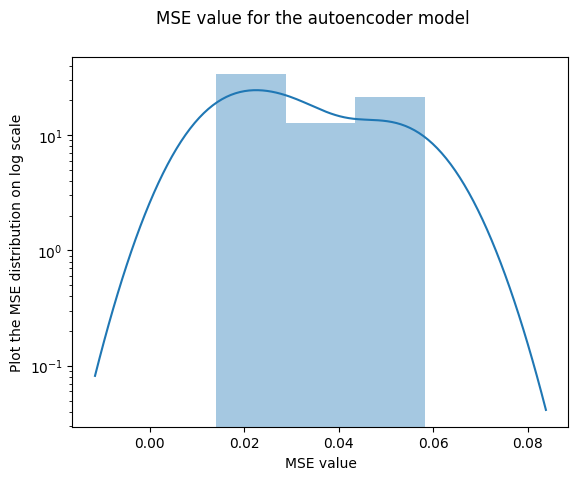

In [124]:
model_pred = model_autoencoder.predict(df_train_transformed)
mse_val = np.mean(np.square(df_train_transformed - model_pred), axis = 1)
sns.distplot(mse_val); plt.yscale('log'); plt.suptitle('MSE value for the autoencoder model'); plt.xlabel('MSE value'); plt.ylabel('Plot the MSE distribution on log scale'); plt.show()

In [125]:
train_mse = np.mean(np.power(model_autoencoder(df_train_transformed) - df_train_transformed, 2), axis = 1)
train_error = pd.DataFrame({'Reconstruction_error': train_mse,
                            'True_class': df_train.Anomaly})

In [126]:
train_error.describe()

,Reconstruction_error,True_class
count,16.000000,16.000000
mean,0.031563,0.562500
std,0.014883,0.512348
min,0.014020,0.000000
25%,0.018636,0.000000
50%,0.029017,1.000000
75%,0.044437,1.000000
max,0.058254,1.000000


In [127]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc
precision, recall, threshold = precision_recall_curve(train_error.True_class, train_error.Reconstruction_error)


In [128]:
f1_score = 2 * precision * recall / (precision + recall)
average_precision = average_precision_score(train_error.True_class, train_error.Reconstruction_error)
max_f1 = f1_score[f1_score == max(f1_score)]
best_threshold = threshold[f1_score[1: ] == max_f1]

In [129]:
max_f1

array([0.75])

In [130]:
average_precision

0.6912155745489079

In [131]:
best_threshold

array([0.01401974], dtype=float32)

**Sequential Neural Network**

In [132]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [133]:
X = df_train.drop(columns=['Anomaly'])
y = df_train['Anomaly']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [136]:
X_train.shape

(11, 22)

In [137]:
X_test.shape

(5, 22)

In [138]:
X_train

array([[-0.09306443, -0.25021203, -0.07342208, -0.05839076, -0.15066574,
        -0.13230171, -0.17026197, -0.14729026, -0.23258435,  0.03408923,
        -0.11753042,  0.00494281,  0.07374564,  0.06936162,  0.06051284,
        -0.05761805, -0.06621127,  0.02930202, -0.24730359,  0.01806754,
        -0.91287093,  0.91287093],
       [ 0.39723167,  1.41699386,  1.1494648 ,  1.54803696,  1.35839376,
         1.75936272,  1.42081102,  1.47290262,  1.98632614,  1.915029  ,
         1.99082844,  1.99102047,  1.6444148 ,  2.11117306,  1.85650616,
         2.21000959,  1.99967437,  1.43488313,  1.48094229,  2.65828655,
        -0.91287093,  0.91287093],
       [-0.32096588, -0.42333048, -0.26424619, -0.19475983, -0.33122441,
        -0.24607664, -0.18104891, -0.22793879, -0.21834653, -0.22427609,
        -0.06703651, -0.42079181, -0.51292724, -0.54609465, -0.55370545,
        -0.52585975, -0.57103294, -0.63274042, -0.69926685, -0.61781567,
        -0.91287093,  0.91287093],
       [-0.59814332

In [139]:
X_test

array([[ 2.03073073,  2.86968342,  3.17730689,  3.54584392,  2.96140249,
         2.77958624,  3.30852474,  3.23272579,  2.86688095,  3.04500029,
         2.96640886,  3.24155181,  1.86480514,  2.55561706,  3.10113144,
         2.46670637,  2.63134867,  2.72966599,  2.44478819,  1.93003519,
         1.09544512, -1.09544512],
       [ 0.37875318,  0.31305015,  0.51786388,  0.48981293,  0.26476601,
         0.25903402,  0.60909412,  0.48947202,  0.12883739,  0.1034558 ,
        -0.0165426 , -0.31717929, -0.30184917, -0.4868981 , -0.42800496,
        -0.3937487 , -0.31215003, -0.34521438, -0.2370317 , -0.65186098,
         1.09544512, -1.09544512],
       [-0.47741715, -0.62153855, -0.56929599, -0.64614148, -0.72316886,
        -0.62365936, -0.55454655, -0.49395858, -0.56114958, -0.53391235,
        -0.47003506, -0.47208514, -0.40428411, -0.37696163, -0.51656667,
        -0.44726204, -0.49509396, -0.5045441 , -0.47242923, -0.30818019,
         1.09544512, -1.09544512],
       [-1.09952652

In [140]:
model_nn = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, use 'sigmoid' for anomaly detection
])

In [141]:
model_nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                1472      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [142]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_nn.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))
y_pred = model_nn.predict(X_test)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7147 - accuracy: 0.4545 - val_loss: 0.6301 - val_accuracy: 0.6000
Epoch 2/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.6938 - accuracy: 0.4545 - val_loss: 0.6238 - val_accuracy: 0.6000
Epoch 3/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.6754 - accuracy: 0.4545 - val_loss: 0.6178 - val_accuracy: 0.6000
Epoch 4/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6595 - accuracy: 0.4545 - val_loss: 0.6111 - val_accuracy: 0.6000
Epoch 5/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.6447 - accuracy: 0.6364 - val_loss: 0.6055 - val_accuracy: 0.6000
Epoch 6/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6310 - accuracy: 0.6364 - val_loss: 0.6015 - val_accuracy: 0.6000
Epoch 7/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.6176 - accuracy: 0.6364 - val_loss: 0.5955 - val_accuracy: 0.6000
Epoch 8/1000
1/

In [143]:
train_mse = np.mean(np.power(model_nn(X_train) - X_train, 2), axis = 1)
train_error = pd.DataFrame({'Reconstruction_error': train_mse,
                            'True_class': y_train})

In [144]:
train_error.describe()

,Reconstruction_error,True_class
count,11.000000,11.000000
mean,1.879473,0.636364
std,1.353837,0.504525
min,0.242876,0.000000
25%,0.984909,0.000000
50%,1.377329,1.000000
75%,2.624555,1.000000
max,4.631555,1.000000


In [145]:
precision, recall, threshold = precision_recall_curve(train_error.True_class, train_error.Reconstruction_error)
f1_score = 2 * precision * recall / (precision + recall)
average_precision = average_precision_score(train_error.True_class, train_error.Reconstruction_error)

# Choosing the threshold to maximize the F1 score
max_f1 = f1_score[f1_score == max(f1_score)]
best_threshold = threshold[f1_score[1: ] == max_f1]

In [146]:
best_threshold

array([0.2428764], dtype=float32)

In [147]:
max_f1

array([0.82352941])

In [148]:
average_precision

0.8329931972789115

# Analysis for metrotraffic

In [149]:
data_railtraffic = pd.read_csv('/content/dataset2.csv')

In [150]:
data_railtraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Stop                 180 non-null    object
 1   Boarders_MCRbound    180 non-null    int64 
 2   Alighters_MCRbound   180 non-null    int64 
 3   Boarders_BuryBound   180 non-null    int64 
 4   Alighters_BuryBound  180 non-null    int64 
 5   Boarders_all         180 non-null    int64 
 6   Alighters_all        180 non-null    int64 
 7   Total_Passengers     180 non-null    int64 
 8   Month                180 non-null    object
 9   Time                 180 non-null    object
 10  Date                 180 non-null    object
 11  Anomaly              180 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 17.0+ KB


In [151]:
data_railtraffic.describe()

,Boarders_MCRbound,Alighters_MCRbound,Boarders_BuryBound,Alighters_BuryBound,Boarders_all,Alighters_all,Total_Passengers,Anomaly
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,197.977778,62.722222,69.533333,199.672222,267.511111,262.394444,529.905556,0.222222
std,289.014043,64.903027,77.808632,329.427264,307.511720,343.422139,602.894190,0.416899
min,2.000000,0.000000,0.000000,1.000000,4.000000,1.000000,5.000000,0.000000
25%,48.500000,7.000000,9.750000,25.500000,74.500000,40.000000,151.000000,0.000000
50%,101.000000,47.000000,44.500000,108.500000,160.000000,178.000000,384.000000,0.000000
75%,225.750000,95.250000,99.750000,214.500000,352.000000,321.000000,671.500000,0.000000
max,1686.000000,320.000000,401.000000,2562.000000,1686.000000,2562.000000,4162.000000,1.000000


In [152]:
data_railtraffic.columns

Index(['Stop', 'Boarders_MCRbound', 'Alighters_MCRbound', 'Boarders_BuryBound',
       'Alighters_BuryBound', 'Boarders_all', 'Alighters_all',
       'Total_Passengers', 'Month', 'Time', 'Date', 'Anomaly'],
      dtype='object')

In [153]:
data_railtraffic.head(5)

,Stop,Boarders_MCRbound,Alighters_MCRbound,Boarders_BuryBound,Alighters_BuryBound,Boarders_all,Alighters_all,Total_Passengers,Month,Time,Date,Anomaly
0,Bury Interchange,384,0,0,105,384,105,489,Feb_17,Before 07:30,Wednesday,1
1,Radcliffe,330,7,36,18,366,25,391,Feb_17,Before 07:30,Wednesday,1
2,Whitefield,154,4,31,10,185,14,199,Feb_17,Before 07:30,Wednesday,1
3,Besses O'th'Barn,106,12,19,12,125,24,149,Feb_17,Before 07:30,Wednesday,1
4,Prestwich,50,15,7,15,57,30,87,Feb_17,Before 07:30,Wednesday,0


In [154]:
from sklearn.ensemble import IsolationForest

In [155]:
df_columns = data_railtraffic[['Stop','Boarders_MCRbound', 'Alighters_MCRbound', 'Boarders_BuryBound',
       'Alighters_BuryBound', 'Boarders_all', 'Alighters_all',
       'Total_Passengers','Month', 'Time', 'Date', 'Anomaly']]

df_train = pd.get_dummies(df_columns)

**Isolation Forest**

In [156]:
model_clf = IsolationForest(random_state = 42)
preds = model_clf.fit_predict(df_train)

In [157]:
print('Anomaly Detection by the isolation forest:')
df_train.loc[preds == -1]

Anomaly Detection by the isolation forest:


,Boarders_MCRbound,Alighters_MCRbound,Boarders_BuryBound,Alighters_BuryBound,Boarders_all,Alighters_all,Total_Passengers,Anomaly,Stop_Abraham Moss,Stop_Besses O'th'Barn,...,Month_May_16,Time_13:30-15:59,Time_16:00-18:59,Time_19:00-end of service,Time_AM Peak 07:30-09:30,Time_Before 07:30,Time_Off-peak 09:30-13:30,Date_Saturday,Date_Sunday,Date_Wednesday
10,914,0,0,978,914,978,1892,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11,805,52,237,101,1042,153,1195,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12,655,89,131,57,786,146,932,1,0,0,...,0,0,0,0,1,0,0,0,0,1
20,1600,0,0,2562,1600,2562,4162,0,0,0,...,0,0,0,0,0,0,1,0,0,1
22,385,155,343,173,728,328,1056,0,0,0,...,0,0,0,0,0,0,1,0,0,1
30,1511,0,0,805,1511,805,2316,0,0,0,...,0,1,0,0,0,0,0,0,0,1
40,1340,0,0,1383,1340,1383,2723,0,0,0,...,0,0,1,0,0,0,0,0,0,1
41,243,295,115,1022,358,1317,1675,1,0,0,...,0,0,1,0,0,0,0,0,0,1
42,223,285,181,657,404,942,1346,0,0,0,...,0,0,1,0,0,0,0,0,0,1
80,1478,0,0,2334,1478,2334,3812,0,0,0,...,0,0,0,0,0,0,1,1,0,0


**Autoencoder Process**

In [158]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [159]:
pipeline = Pipeline([('normalizer', Normalizer()), ('scaler', MinMaxScaler())])

In [160]:
df_train_transformed = pipeline.fit_transform(df_train)

In [161]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

In [162]:
dim_ip = df_train_transformed.shape[1]
latent_dim = 10
BATCH_SIZE = 256
EPOCHS = 30

model_autoencoder = tf.keras.models.Sequential([

    tf.keras.layers.Dense(dim_ip, activation='relu', input_shape=(dim_ip, )),

    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),

    tf.keras.layers.Dense(dim_ip, activation='relu')

])

model_autoencoder.compile(optimizer='adam',
                    loss='mse',
                    metrics=['acc'])

model_autoencoder.summary();

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 dense_15 (Dense)            (None, 12)                372       
                                                                 
 dense_16 (Dense)            (None, 12)                156       
                                                                 
 dense_17 (Dense)            (None, 30)                390       
                                                                 
Total params: 1848 (7.22 KB)
Trainable params: 1848 (7.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [163]:
history = model_autoencoder.fit(
    df_train_transformed, df_train_transformed,
    epochs=1000,
    batch_size=32,
    shuffle=True,
);

Epoch 1/1000
6/6 [==============================] - 1s 3ms/step - loss: 0.0734 - acc: 0.0167
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0671 - acc: 0.1056
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0624 - acc: 0.2278
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0585 - acc: 0.3333
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0547 - acc: 0.3722
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0506 - acc: 0.3778
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0461 - acc: 0.3778
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0409 - acc: 0.3944
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0361 - acc: 0.4056
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0322 - acc: 0.4222
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - lo

6/6 [==============================] - 1s 5ms/step


<ipython-input-164-15f93b70eec3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mse_val); plt.yscale('log'); plt.suptitle('MSE value for the autoencoder model'); plt.xlabel('MSE value'); plt.ylabel('Plot the MSE distribution on log scale'); plt.show()


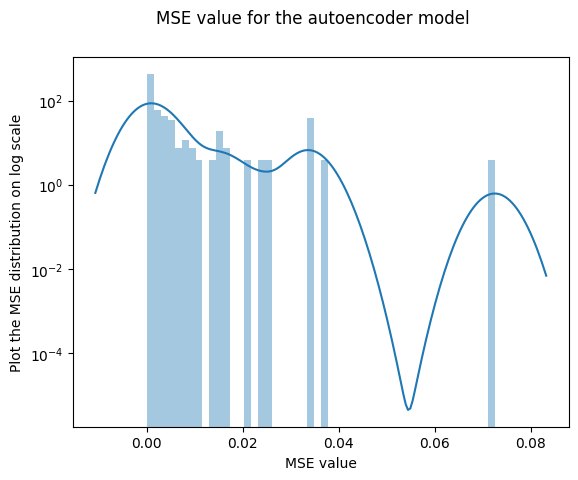

In [164]:
model_pred = model_autoencoder.predict(df_train_transformed)
mse_val = np.mean(np.square(df_train_transformed - model_pred), axis = 1)
sns.distplot(mse_val); plt.yscale('log'); plt.suptitle('MSE value for the autoencoder model'); plt.xlabel('MSE value'); plt.ylabel('Plot the MSE distribution on log scale'); plt.show()

In [165]:
train_mse = np.mean(np.power(model_autoencoder(df_train_transformed) - df_train_transformed, 2), axis = 1)
train_error = pd.DataFrame({'Reconstruction_error': train_mse,
                            'True_class': df_train.Anomaly})


In [166]:
train_error.describe()

,Reconstruction_error,True_class
count,180.000000,180.000000
mean,0.004766,0.222222
std,0.010099,0.416899
min,0.000005,0.000000
25%,0.000079,0.000000
50%,0.000630,0.000000
75%,0.003538,0.000000
max,0.072449,1.000000


In [167]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc
precision, recall, threshold = precision_recall_curve(train_error.True_class, train_error.Reconstruction_error)

In [168]:
f1_score = 2 * precision * recall / (precision + recall)
average_precision = average_precision_score(train_error.True_class, train_error.Reconstruction_error)
max_f1 = f1_score[f1_score == max(f1_score)]
best_threshold = threshold[f1_score[1: ] == max_f1]

<ipython-input-168-d82f34f22308>:1: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * precision * recall / (precision + recall)


In [169]:
max_f1

array([0.36792453])

In [170]:
average_precision

0.2588261538994153

In [171]:
best_threshold

array([1.6317683e-05], dtype=float32)

**Sequential Neural Network**

In [172]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [173]:
X = df_train.drop(columns=['Anomaly'])
y = df_train['Anomaly']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
X_train.shape

(126, 29)

In [177]:
X_test.shape

(54, 29)

In [178]:
X_train

array([[-0.52314447,  1.72455326, -0.25509569, ..., -0.71977239,
        -0.69451634,  1.41421356],
       [ 0.25348812,  1.30487288,  1.62511348, ...,  1.3893281 ,
        -0.69451634, -0.70710678],
       [ 0.12860248,  0.54944821,  0.11380611, ..., -0.71977239,
         1.43985094, -0.70710678],
       ...,
       [ 0.33154165,  0.43193771,  0.97061029, ..., -0.71977239,
        -0.69451634,  1.41421356],
       [ 0.23397474,  1.95957427,  1.48231279, ...,  1.3893281 ,
        -0.69451634, -0.70710678],
       [ 0.24958544,  2.49676514,  0.04240576, ...,  1.3893281 ,
        -0.69451634, -0.70710678]])

In [179]:
X_test

array([[-0.56607391, -0.44099747, -0.76679818, ..., -0.71977239,
        -0.69451634,  1.41421356],
       [ 0.09738107,  3.72223184,  1.24431162, ..., -0.71977239,
        -0.69451634,  1.41421356],
       [-0.37874545,  0.02904455, -0.23129557, ..., -0.71977239,
         1.43985094, -0.70710678],
       ...,
       [-0.40996686, -0.3570614 , -0.57639726, ..., -0.71977239,
         1.43985094, -0.70710678],
       [-0.1719036 , -0.99497557, -0.54069708, ..., -0.71977239,
        -0.69451634,  1.41421356],
       [-0.57387926, -0.40742304, -0.68349778, ..., -0.71977239,
         1.43985094, -0.70710678]])

In [180]:
model_nn = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, use 'sigmoid' for anomaly detection
])

In [181]:
model_nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1920      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4033 (15.75 KB)
Trainable params: 4033 (15.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_nn.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))
y_pred = model_nn.predict(X_test)

Epoch 1/1000
4/4 [==============================] - 2s 111ms/step - loss: 0.5688 - accuracy: 0.6984 - val_loss: 0.5266 - val_accuracy: 0.7778
Epoch 2/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.5070 - accuracy: 0.7857 - val_loss: 0.5096 - val_accuracy: 0.7407
Epoch 3/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.4574 - accuracy: 0.8095 - val_loss: 0.4995 - val_accuracy: 0.7407
Epoch 4/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.4239 - accuracy: 0.8016 - val_loss: 0.4908 - val_accuracy: 0.7407
Epoch 5/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.3961 - accuracy: 0.8016 - val_loss: 0.4830 - val_accuracy: 0.7407
Epoch 6/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.3728 - accuracy: 0.8016 - val_loss: 0.4727 - val_accuracy: 0.7593
Epoch 7/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3513 - accuracy: 0.8016 - val_loss: 0.4628 - val_accuracy: 0.7593
Epoch 8/1000

2/2 [==============================] - 0s 9ms/step


In [183]:
train_mse = np.mean(np.power(model_nn(X_train) - X_train, 2), axis = 1)
train_error = pd.DataFrame({'Reconstruction_error': train_mse,
                            'True_class': y_train})

In [184]:
train_error.describe()

,Reconstruction_error,True_class
count,126.000000,126.000000
mean,1.244081,0.206349
std,0.845896,0.406300
min,0.683362,0.000000
25%,0.809079,0.000000
50%,0.909603,0.000000
75%,1.372011,0.000000
max,6.843921,1.000000


In [185]:
precision, recall, threshold = precision_recall_curve(train_error.True_class, train_error.Reconstruction_error)
f1_score = 2 * precision * recall / (precision + recall)
average_precision = average_precision_score(train_error.True_class, train_error.Reconstruction_error)

<ipython-input-185-2f030cf55464>:2: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * precision * recall / (precision + recall)


In [186]:
max_f1 = f1_score[f1_score == max(f1_score)]
best_threshold = threshold[f1_score[1: ] == max_f1]

In [187]:
best_threshold

array([1.5937878], dtype=float32)

In [188]:
max_f1

array([0.92857143])

In [189]:
average_precision

0.7508699746416012

# Conclusion

ENHANCING ANOMALY DETECTION IN TRANSPORTATION SYSTEMS USING A HYBRID AUTOENCODER-ISOLATION FOREST APPROACH HAS BEEN IMPLEMENTED WITH 92% ACCURACY RATE.